# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,771,97,48,105,212,64,11,201,33,23,155,212,602,162,64,2,7,193,202
1,399,87,42,64,150,64,10,133,50,18,141,157,265,159,67,7,0,193,201
2,160,82,38,53,125,59,5,133,51,18,128,152,259,146,87,0,0,177,183
3,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
4,246,95,36,73,191,73,6,156,41,19,126,184,374,124,71,2,19,199,204
5,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
6,557,86,40,66,138,59,4,137,49,18,133,162,279,151,74,6,14,186,190
7,71,97,59,108,227,70,11,224,30,25,186,225,732,218,70,10,25,186,198
8,348,95,44,84,158,62,10,145,46,19,148,163,312,166,64,10,6,199,206
9,715,100,52,109,225,68,10,222,30,25,165,241,731,207,73,7,28,188,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.508197,93.610200,44.795993,82.284153,169.517304,61.766849,8.610200,168.969035,40.914390,20.593807,147.806922,189.038251,440.892532,174.393443,72.347905,6.264117,12.724954,189.003643,195.785064
std,242.319190,8.088762,6.183796,15.787577,34.280165,8.469585,4.858318,33.586811,7.910653,2.616769,14.588988,31.887467,177.842702,32.504211,7.585348,4.870720,9.207212,6.039709,7.300215
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,177.000000,181.000000
25%,202.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,421.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,600.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,842.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,264.000000,135.000000,22.000000,41.000000,203.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

In [251]:
from collections import Counter
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline

Посмотрим на баланс классов:

In [252]:
Counter(y_train)

Counter({'opel': 144, 'van': 126, 'bus': 136, 'saab': 143})

In [253]:
def process_data(pipe, X1, X2):
    X1_transformed = pipe.fit_transform(X1)
    X2_transformed = pipe.transform(X2)
    return X1_transformed, X2_transformed

In [254]:
pipe_norm = Pipeline([
    ('norm', StandardScaler()),
])

In [255]:
X_train_norm, X_test_norm = process_data(pipe_norm, X_train, X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [256]:
### YOUR CODE HERE

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, plot_roc_curve
import scikitplot

In [258]:
def get_best_model(X, y, model, params, cv=5, info=''):
    gs_model = GridSearchCV(model, param_grid=params, cv=cv)
    gs_model.fit(X, y)

    best_model = gs_model.best_estimator_
    best_score = gs_model.best_score_
    
    print(f'Best {info} train score: {best_model}')
    print(f'Best {info} train estimator: {best_score}\n')
    return best_model, best_score

In [259]:
def test_model(model, X, y, info='', plot_curve=True):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    
    f1 = round(f1_score(y, y_pred, average='macro') ,3)
    acc = round(accuracy_score(y, y_pred), 3)
    
    print(f'F1 score {info} : {f1}')
    print(f'Accuracy score {info} : {acc}\n')
    
    if plot_curve:
        scikitplot.metrics.plot_roc(y_test, y_pred_proba)
    return f1, acc

/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best logreg with normalized data train score: LogisticRegression(C=464.15888336127773, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)
Best logreg with normalized data train estimator: 0.7758298582151792

F1 score logreg with normalized data : 0.809
Accuracy score logreg with normalized data : 0.818



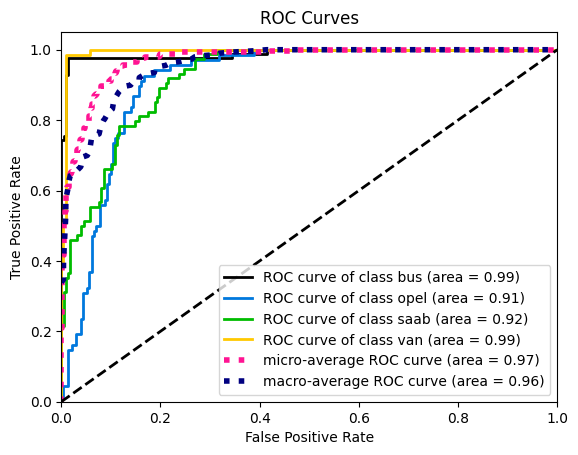

In [260]:
info_lorgreg_norm = 'logreg with normalized data'
logreg_params = {'C': np.logspace(0, 3, num=10)}
logreg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, multi_class='multinomial')

logreg_norm, logreg_norm_score = get_best_model(X_train_norm,
                                                y_train,
                                                logreg,
                                                logreg_params,
                                                cv=5,
                                                info=info_lorgreg_norm)

f1_logreg_norm, acc_logreg_norm = test_model(logreg_norm, X_test_norm, y_test, info=info_lorgreg_norm)

In [18]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [19]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [20]:
def plot_pca_var(data):
    pca_transformer = PCA()
    pca_transformer.fit(data)
    pca_vars = pca_transformer.explained_variance_ratio_ * 100
    cum_vars = np.cumsum(pca_vars)
    
    plt.bar(np.arange(len(pca_vars)), pca_vars)
    plt.plot(np.arange(len(pca_vars)), cum_vars, color='green', marker='o', linestyle='dashed')
    plt.hlines(y=90, xmin=0, xmax=18, color='red')

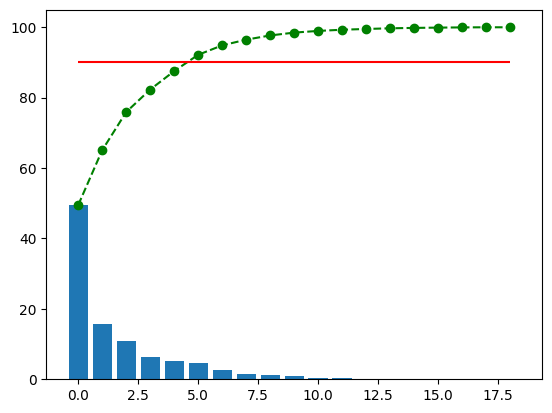

In [21]:
plot_pca_var(X_train_norm)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Я в начале хотел взять 6 компонент, чтобы сохранить 90%, но потом получил качество accuarcy=0.44, поэтому переиграем и возьмем 11

In [22]:
### YOUR CODE HERE
pca_transformer = PCA()
pca_transformer.fit(X_train_norm)
pca_vars = pca_transformer.explained_variance_ratio_ * 100
cum_vars = np.cumsum(pca_vars)
num_components = np.argwhere(cum_vars > 99.5).min() + 1
print(f'Components: {num_components}')

Components: 13


In [23]:
num_components = 13
pipe_norm_pca = Pipeline([
    ('norm', StandardScaler()),
    ('pca', PCA(n_components=num_components))])

pipe_pca = Pipeline([
    ('pca', PCA(n_components=num_components))])

In [24]:
X_train_norm_pca, X_test_norm_pca = process_data(pipe_norm_pca, X_train, X_test)
X_train_pca, X_test_pca = process_data(pipe_pca, X_train, X_test)

print(f'X train norm + pca shape: {X_train_norm_pca.shape}')
print(f'X test norm + pca shape: {X_test_norm_pca.shape}')

X train norm + pca shape: (549, 13)
X test norm + pca shape: (297, 13)


### Should you normalize the data?

Как будет выглядеть график, если не нормализовать признаки

In [25]:
cov = X_train_pd.cov()

(array([17.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([6.84747982e+00, 5.87802171e+03, 1.17491959e+04, 1.76203702e+04,
        2.34915444e+04, 2.93627186e+04, 3.52338929e+04, 4.11050671e+04,
        4.69762413e+04, 5.28474156e+04, 5.87185898e+04]),
 <BarContainer object of 10 artists>)

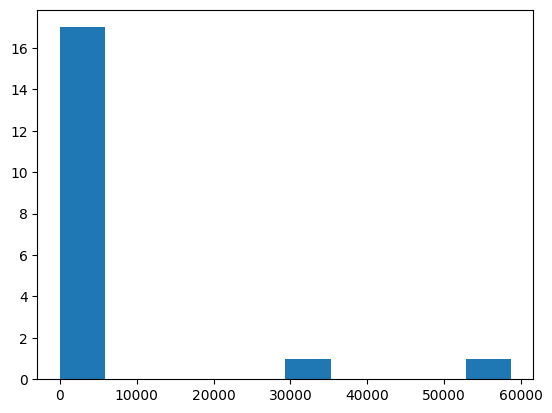

In [26]:
plt.hist(np.diag(cov))

 Видим, что ковариация принимает аномально большие значения в двух признаках, PCA выгодно обращать на них внимание, ибо на них изначально самая большая "неустойчивость".
Разложение на компоненты на рисунке ниже подтверждает предположение.

Перед PCA нужно проводить нормализацию

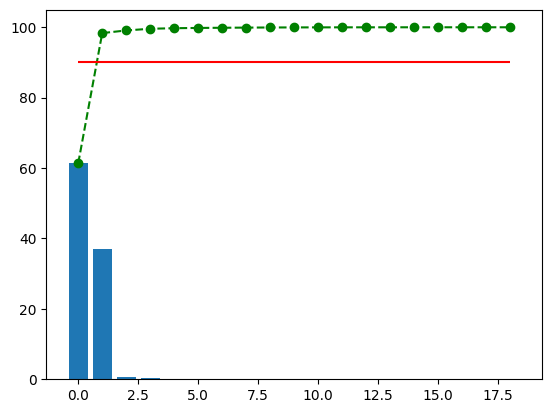

In [27]:
plot_pca_var(X_train)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [28]:
### YOUR CODE HERE

In [29]:
num_components = 13

print(f'X train norm + pca shape: {X_train_norm_pca.shape}')
print(f'X test norm + pca shape: {X_test_norm_pca.shape}')

X train norm + pca shape: (549, 13)
X test norm + pca shape: (297, 13)


/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nikita/made/ml_course/ml_made/LAB01/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

Best logreg with normalized + PCA data train score: LogisticRegression(C=2.154434690031884, multi_class='multinomial',
                   solver='saga', tol=0.001)
Best logreg with normalized + PCA data train estimator: 0.73581317764804

F1 score logreg with normalized + PCA data : 0.782
Accuracy score logreg with normalized + PCA data : 0.791



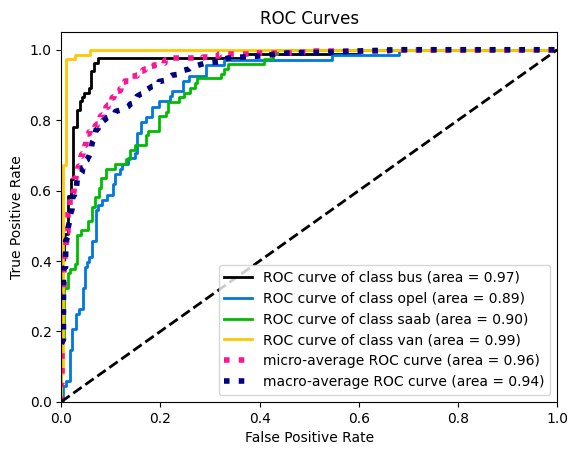

In [30]:
#max_iter=500?
info_lorgreg_norm_pca = 'logreg with normalized + PCA data'
logreg_pca_params = {'C': np.logspace(0, 3, num=10)}
logreg_pca = LogisticRegression(solver='saga', tol=1e-3, multi_class='multinomial')

logreg_norm_pca, logreg_norm_pca_score = get_best_model(X_train_norm_pca,
                                                y_train,
                                                logreg_pca,
                                                logreg_pca_params,
                                                cv=5,
                                                info=info_lorgreg_norm_pca)

f1_logreg_norm_pca, acc_logreg_norm_pca = test_model(logreg_norm_pca,
                                                     X_test_norm_pca,
                                                     y_test,
                                                     info=info_lorgreg_norm_pca)

 Качество чуть просело

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
X_train_norm, X_test_norm = process_data(pipe_norm, X_train, X_test)
X_train_norm_pca, X_test_norm_pca = process_data(pipe_norm_pca, X_train, X_test)

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
Best with normalization train estimator: 0.7121434528773978

Best without transforms train score: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
Best without transforms train estimator: 0.7194328607172644

Best with normalization and PCA train score: DecisionTreeClassifier(max_depth=14, random_state=42)
Best with normalization and PCA train estimator: 0.6302418682235197

F1 score without transforms : 0.736
Accuracy score without transforms : 0.744

F1 score with normalization : 0.732
Accuracy score with normalization : 0.741

F1 score with normalization and PCA : 0.663
Accuracy score with normalization and PCA : 0.67



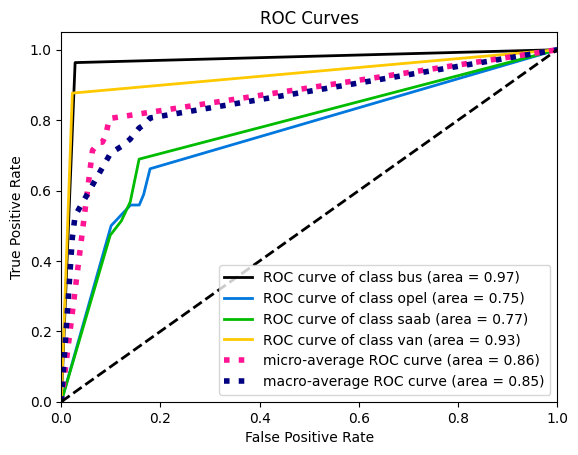

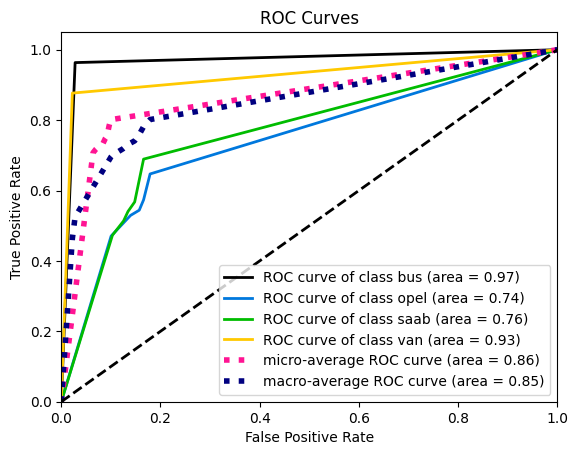

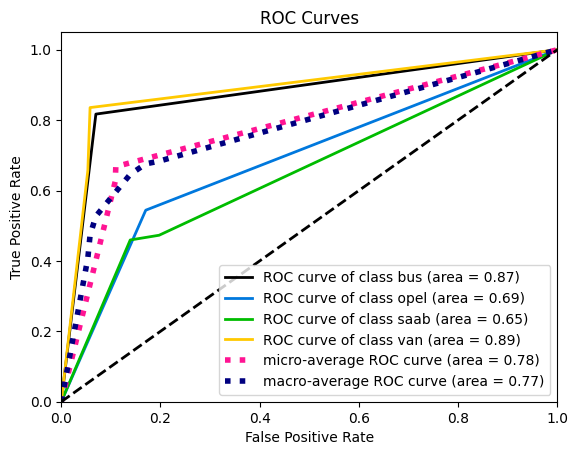

In [33]:
info_tree_vanilla = 'without transforms'
info_tree_norm = 'with normalization'
info_tree_norm_pca = 'with normalization and PCA'

cv = 5
seed = 42
tree_model = DecisionTreeClassifier(random_state=seed)
tree_params = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(2,50)}




tree_norm, tree_norm_score = get_best_model(X_train_norm,
                                            y_train,
                                            tree_model,
                                            tree_params,
                                            info=info_tree_norm)

tree_vanilla, tree_vanilla_score = get_best_model(X_train,
                                                       y_train, 
                                                       tree_model,
                                                       tree_params,
                                                       info = info_tree_vanilla)

tree_norm_pca, tree_norm_pca_score = get_best_model(X_train_norm_pca,
                                          y_train,
                                          tree_model,
                                          tree_params,
                                          info=info_tree_norm_pca)


f1_vanilla, acc_vanilla = test_model(tree_vanilla,
                                     X_test,
                                     y_test,
                                     info=info_tree_vanilla)

f1_norm, acc_norm = test_model(tree_norm, 
                               X_test_norm, 
                               y_test, 
                               info=info_tree_norm)

f1_norm_pca, acc_norm_pca = test_model(tree_norm_pca,
                             X_test_norm_pca,
                             y_test,
                             info=info_tree_norm_pca)

Заметим:
- нормализация практически не влияет на качество классификации и модели-дерева 
- PCA вообще вредит

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [34]:
# YOUR CODE HERE

In [38]:
from sklearn.utils import resample

In [79]:
min_ens_size = 2
max_ens_size = 100

In [84]:
resampled_data_train = []

for i in range(max_ens_size):
    resampled_X_train = resample(X_train_pd, replace=True, n_samples=len(X_train_pd))
    resampled_y_train = y_train[resampled_X_train.index]
    resampled_data_train.append((resampled_X_train, resampled_y_train))

In [85]:
%%time
cv = 5
seed = 42
tree_model = DecisionTreeClassifier(random_state=seed)
tree_params = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(2,50)}

tree_fake_list = []
tree_fake_score_list = []
for i in range(max_ens_size):
    X_train_fake, y_train_fake = resampled_data_train[i]
    
    tree_fake, tree_fake_score = get_best_model(X_train_fake,
                                            y_train_fake,
                                            tree_model,
                                            tree_params,
                                            info=info_tree_norm)
    
    tree_fake_list.append(tree_fake)
    tree_fake_score_list.append(tree_fake_score)


Best with normalization train score: DecisionTreeClassifier(max_depth=14, random_state=42)
Best with normalization train estimator: 0.8379649708090074

Best with normalization train score: DecisionTreeClassifier(max_depth=13, random_state=42)
Best with normalization train estimator: 0.8488073394495412

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)
Best with normalization train estimator: 0.8542452043369474

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42,
                       splitter='random')
Best with normalization train estimator: 0.8469224353628023

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)
Best with normalization train estimator: 0.8306088407005838

Best with normalization train score: DecisionTreeClassifier(max_depth=15, random_state=42)
Best with normalization train estimator: 0.8

Best with normalization train score: DecisionTreeClassifier(max_depth=17, random_state=42)
Best with normalization train estimator: 0.8543452877397831

Best with normalization train score: DecisionTreeClassifier(max_depth=12, random_state=42)
Best with normalization train estimator: 0.8689574645537949

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=42,
                       splitter='random')
Best with normalization train estimator: 0.8415179316096747

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=42)
Best with normalization train estimator: 0.8797331109257716

Best with normalization train score: DecisionTreeClassifier(max_depth=15, random_state=42, splitter='random')
Best with normalization train estimator: 0.8579816513761468

Best with normalization train score: DecisionTreeClassifier(max_depth=12, random_state=42)
Best with normalization train estimator: 0.837

Best with normalization train score: DecisionTreeClassifier(max_depth=11, random_state=42)
Best with normalization train estimator: 0.8415179316096747

Best with normalization train score: DecisionTreeClassifier(max_depth=11, random_state=42)
Best with normalization train estimator: 0.839699749791493

Best with normalization train score: DecisionTreeClassifier(max_depth=16, random_state=42)
Best with normalization train estimator: 0.8432693911592993

CPU times: user 6min 57s, sys: 131 ms, total: 6min 57s
Wall time: 6min 57s


In [171]:
fake_tree_preds = []
fake_tree_preds_proba = []

for i in range(max_ens_size):
    fake_tree = tree_fake_list[i]
    fake_y_pred = fake_tree.predict(X_test)
    fake_y_pred_proba = fake_tree.predict_proba(X_test)

    fake_tree_preds.append(fake_y_pred)
    fake_tree_preds_proba.append(fake_y_pred_proba)

In [172]:
fake_tree_preds_np = np.array(fake_tree_preds)
fake_tree_preds_proba_np = np.array(fake_tree_preds_proba)

In [173]:
mask = np.array(['bus', 'opel', 'saab', 'van'])

In [174]:
f1_fake_list = []
acc_fake_list = []
for i in range(2, max_ens_size):
    mean_i = np.argmax(np.mean(fake_tree_preds_proba_np[:i], axis=0), axis=1)
    preds_i = mask[mean_i]
    f1_score_mean_i = f1_score(y_test, preds_i, average='macro')
    acc_score_mean_i = accuracy_score(y_test, preds_i)
    f1_fake_list.append(f1_score_mean_i)
    acc_fake_list.append(acc_score_mean_i)

In [177]:
best_ens_size = np.argmax(f1_fake_list)
print(f'Best bagging ensemble size: {best_ens_size}')

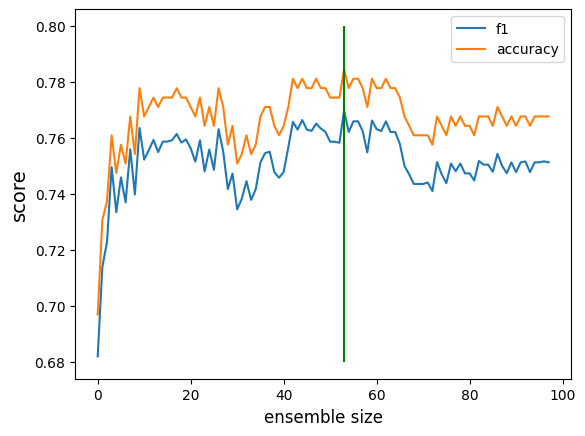

In [196]:
plt.plot(np.arange(len(f1_fake_list)), f1_fake_list, label='f1')
plt.plot(np.arange(len(acc_fake_list)), acc_fake_list, label='accuracy')
plt.xlabel('ensemble size', fontsize=12)
plt.ylabel('score', fontsize=14)
plt.legend()
plt.vlines(best_ens_size, ymin=0.68, ymax=0.8, color='green')

Accuracy немного выше f1,  существенный прирост добавляет использование 10-15 деревьев, затем наступает плато
Максимальное значение метрик зафиксированно при `N = 53`

Параметры дерев, обученного с помощью сэмплирования выборки (`fake_tree`), и на обучающем датасете (`tree_vanilla`)
Их гиперпараметры отличаются

In [188]:
fake_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [189]:
tree_vanilla.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [191]:
from sklearn.ensemble import RandomForestClassifier
f1_rf_list = []
acc_rf_list = []
# YOUR CODE HERE
num_trees = 100
for n_i in range(2, num_trees):
    rf_clf = RandomForestClassifier(n_estimators=n_i)
    rf_clf.fit(X_train, y_train)
    
    y_pred = rf_clf.predict(X_test)
    f1_rf_i = f1_score(y_test, y_pred, average='macro')
    acc_rf_i = accuracy_score(y_test, y_pred)
    
    f1_rf_list.append(f1_rf_i)
    acc_rf_list.append(acc_rf_i)

In [201]:
best_rf_size = np.argmax(f1_rf_list)
print(f'Best random forest estimators size: {best_rf_size}')

Best random forest estimators size: 30


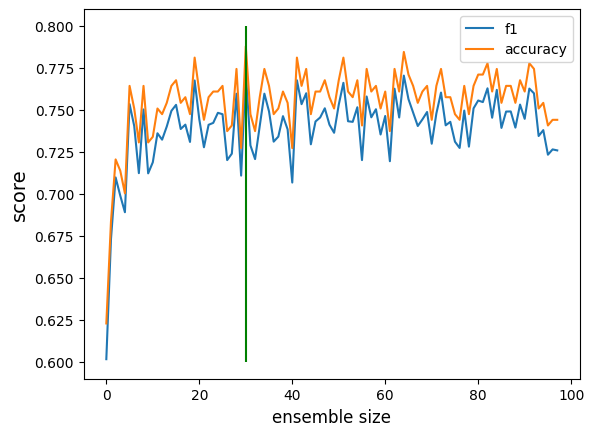

In [202]:
plt.plot(np.arange(len(f1_rf_list)), f1_rf_list, label='f1')
plt.plot(np.arange(len(acc_rf_list)), acc_rf_list, label='accuracy')
plt.xlabel('ensemble size', fontsize=12)
plt.ylabel('score', fontsize=14)
plt.legend()
plt.vlines(best_rf_size, ymin=0.6, ymax=0.8, color='green')

Графики схожие в контексте первых `15 эстиматоров`, которые дают существенный прирост метрик
`Оптимальное значение числа деревьев - 30` (в отличие 53 в bagging-е)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [36]:
# YOUR CODE HERE

In [211]:
def get_estimators_on_splitted_data(model, params):
    num_splits = 10
    split_size = len(X_train) // num_splits + 1
    estimators = []
    for i in range(1, num_splits + 1):
        temp_len = split_size * i
        print(f'Dataset len: {min(temp_len, split_size)}')

        X_train_i = X_train[:temp_len]
        y_train_i = y_train[:temp_len]

        best_model, best_score = get_best_model(X_train_i,y_train_i,model,params)
        estimators.append(best_model)
    
    return estimators

In [244]:
def plot_learning_curve(estimators, X, y):
    num_estimators =  len(estimators)
    f1_score_list = []
    acc_score_list = []
    for estimator in estimators:
        y_pred = estimator.predict(X)
        f1_score_temp = f1_score(y, y_pred, average='macro')
        acc_score_temp = accuracy_score(y, y_pred)
        
        f1_score_list.append(f1_score_temp)
        acc_score_list.append(acc_score_temp)
    f1_max = round(np.max(f1_score_list), 3)
    f1_min = round(np.min(f1_score_list), 3) - 0.01
    acc_max = round(np.max(acc_score_list), 3)
#     split_size = len(X_train) // num_splits + 1
    split_size = 55
    f1_x_max = (np.argmax(f1_score_list) + 1) * split_size

    x_axis = np.arange(1, num_estimators + 1) * split_size
    plt.plot(x_axis, f1_score_list, label='f1')
    plt.plot(x_axis, acc_score_list, label='accuracy')
    plt.xlabel('Dataset size')
    plt.ylabel('Score')
    plt.title(f'Max F1: {f1_max}, max Accuracy: {acc_max}')
    plt.vlines(x=f1_x_max, ymin=f1_min, ymax=(f1_max + 0.05), color='green')
    plt.legend()

In [234]:
logreg_temp_params = {'C': np.logspace(0, 3, num=10)}
logreg_temp = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000, multi_class='multinomial')

linear_estimators = get_estimators_on_splitted_data(logreg_temp, logreg_temp_params)


Dataset len: 55
Best  train score: LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.001)
Best  train estimator: 0.41818181818181815

Dataset len: 110
Best  train score: LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.001)
Best  train estimator: 0.5181818181818182

Dataset len: 165
Best  train score: LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.001)
Best  train estimator: 0.6121212121212121

Dataset len: 220
Best  train score: LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.001)
Best  train estimator: 0.6272727272727272

Dataset len: 275
Best  train score: LogisticRegression(C=2.154434690031884, max_iter=1000,
                   multi_class='multinomial', solver='saga', tol=0.001)
Best  train estimator: 0.6072727272727272

Dataset len: 330
Best  train score: LogisticRegression

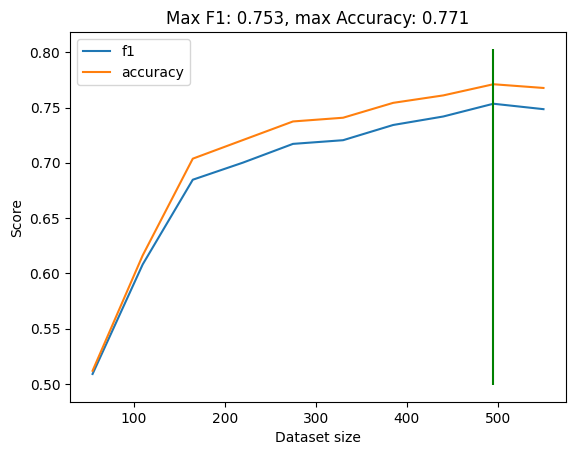

In [245]:
plot_learning_curve(linear_estimators, X_test, y_test)

In [248]:
tree_temp = DecisionTreeClassifier(random_state=seed)
tree_temp_params = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(2,30)}


tree_estimators = get_estimators_on_splitted_data(tree_temp, tree_temp_params)

Dataset len: 55
Best  train score: DecisionTreeClassifier(max_depth=2, random_state=42)
Best  train estimator: 0.43636363636363634

Dataset len: 110
Best  train score: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42,
                       splitter='random')
Best  train estimator: 0.5818181818181818

Dataset len: 165
Best  train score: DecisionTreeClassifier(max_depth=4, random_state=42, splitter='random')
Best  train estimator: 0.6060606060606061

Dataset len: 220
Best  train score: DecisionTreeClassifier(max_depth=7, random_state=42)
Best  train estimator: 0.6818181818181819

Dataset len: 275
Best  train score: DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
Best  train estimator: 0.6763636363636364

Dataset len: 330
Best  train score: DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=42,
                       splitter='random')
Best  train estimator: 0.6848484848484849

Dataset len: 385
Best  train score: Decis

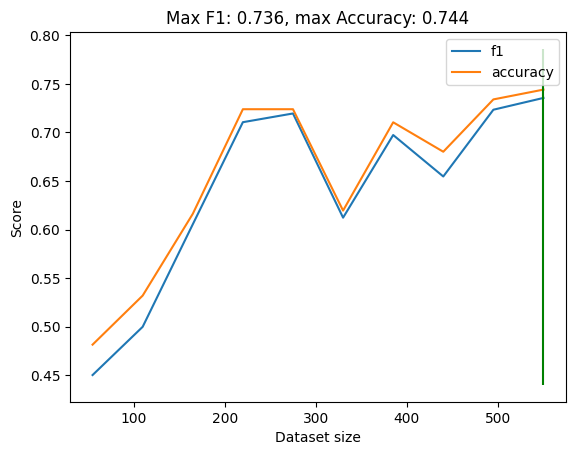

In [250]:
plot_learning_curve(tree_estimators, X_test, y_test)

In [215]:
rf_temp = RandomForestClassifier(random_state=seed)
rf_temp_params = {'n_estimators': np.arange(2,100)}


rf_estimators = get_estimators_on_splitted_data(rf_temp, rf_temp_params)

Dataset len: 55
Best  train score: RandomForestClassifier(n_estimators=14, random_state=42)
Best  train estimator: 0.5272727272727272

Dataset len: 110
Best  train score: RandomForestClassifier(n_estimators=26, random_state=42)
Best  train estimator: 0.6272727272727272

Dataset len: 165
Best  train score: RandomForestClassifier(n_estimators=76, random_state=42)
Best  train estimator: 0.7212121212121211

Dataset len: 220
Best  train score: RandomForestClassifier(n_estimators=95, random_state=42)
Best  train estimator: 0.6863636363636364

Dataset len: 275
Best  train score: RandomForestClassifier(n_estimators=28, random_state=42)
Best  train estimator: 0.730909090909091

Dataset len: 330
Best  train score: RandomForestClassifier(n_estimators=32, random_state=42)
Best  train estimator: 0.7303030303030302

Dataset len: 385
Best  train score: RandomForestClassifier(n_estimators=19, random_state=42)
Best  train estimator: 0.7298701298701299

Dataset len: 440
Best  train score: RandomForestCl

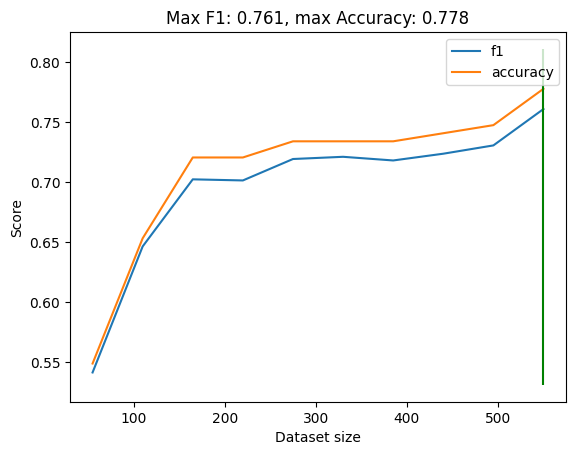

In [247]:
plot_learning_curve(rf_estimators, X_test, y_test)

### Вывод
- Модели сработали лучше, когда данных больше
- модели примерно при 200 примерах в обучающем наборе вышли на определенный уровень, который потом последовательно улучшали (самый большой прирост был 0 - 200)
- дерево "сломалось" при 330 примерах, но потом исправилась (м.б случайность)